In [4]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from craftroom import resample

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

making a quick fake dq 

In [2]:
data = Table.read('extracted_spectra/TRAPPIST-1_G140M_all_coadd2.ecsv')

In [3]:
dq = np.zeros(len(data['WAVELENGTH']))

In [4]:
data['DQ'] = dq

In [5]:
data

WAVELENGTH,FLUX,ERROR,DQ
Angstrom,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),
float64,float64,float64,float64
1194.37721698802,-1.833916440485774e-16,2.5202795376958417e-20,0.0
1194.4305041995433,-1.7901713199101087e-16,2.5359262925815004e-20,0.0
1194.483791118679,-1.7721208561486587e-16,2.6404886579197337e-20,0.0
1194.5370777454316,-1.7327664184066406e-16,2.759147715170851e-20,0.0
1194.5903640798065,-1.4778437633074495e-16,2.6498475354568386e-20,0.0
1194.6436501218082,-1.5632977462487717e-16,2.755954299424868e-20,0.0
1194.6969358714418,-9.990377533124539e-17,3.102219228454872e-20,0.0
1194.7502213287116,-4.419407923641826e-17,3.275252262088243e-20,0.0


In [7]:
ascii.write(data, 'extracted_spectra/TRAPPIST-1_G140M_fake_dq.ecsv', format='ecsv', overwrite=True)

Can I coadd it better?

In [19]:
def new_coadd(f_array, e_array):
    weights = 1 / (e_array**2)
    flux = np.average(f_array, axis =0, weights = weights)
    var = 1 / np.sum(weights, axis=0)
    rcs = np.sum(((flux - f_array)**2) * weights, axis=0) / (len(f_array)-1)
    error = (var * rcs)**0.5
    return flux, var, error

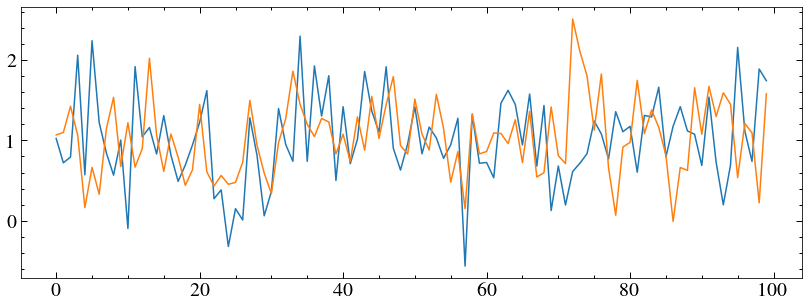

In [13]:
w = np.arange(100)
f1 = np.random.normal(1, 0.5,100)
e1 = np.random.normal(0, 0.5, 100)
f2 = np.random.normal(1, 0.5,100)
e2 = np.random.normal(0, 0.5, 100)
plt.plot(w, f1, w, f2)
#plt.plot(w, e1, w, e2)


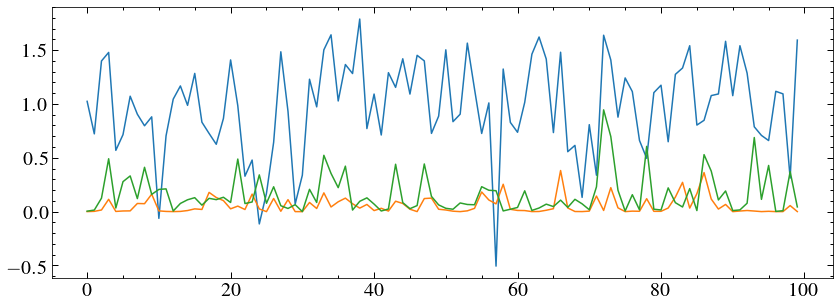

In [20]:
f_av, var, e_av = new_coadd(np.array([f1, f2]), np.array([e1, e2]))
plt.plot(w, f_av)
plt.plot(w, var)
plt.plot(w, e_av)

array([3.94787364e-04, 2.66536306e-03, 1.53977068e-02, 1.14526731e-01,
       1.98109833e-03, 6.12038867e-03, 7.08165304e-03, 7.57373549e-02,
       7.38051740e-02, 1.62066925e-01, 6.97012548e-03, 1.99057784e-03,
       3.99646342e-04, 2.11467060e-03, 1.01616315e-02, 2.56891105e-02,
       2.03518885e-02, 1.78597830e-01, 1.31099288e-01, 1.02124517e-01,
       2.60804280e-02, 5.13316536e-02, 1.97519018e-02, 1.62594871e-01,
       2.51797388e-02, 5.50392643e-06, 1.22187074e-01, 3.39949858e-03,
       1.11327960e-01, 2.65751838e-04, 2.10749852e-05, 8.50332672e-02,
       2.92148980e-02, 1.74230778e-01, 4.33101416e-02, 9.14784785e-02,
       1.25421908e-01, 7.31593015e-02, 3.26841125e-02, 6.67817168e-02,
       9.72037141e-03, 3.09608023e-02, 5.33215012e-03, 9.67561001e-02,
       7.58150313e-02, 2.24046546e-02, 4.54851439e-04, 1.21480568e-01,
       1.25591003e-01, 2.22013776e-02, 1.53744993e-02, 4.20568283e-03,
       1.60062029e-04, 7.39400343e-03, 3.02389322e-02, 1.82396004e-01,
      

In [28]:
path = '/home/david/work/muscles/trappist-1/hst/g140m_cals/'
outpath = path + 'picked_trace_extracts/'
new_x1ds = glob.glob(outpath+'*new_x1d.fits')     
picks = Table.read('new_trace_centers.ecsv')

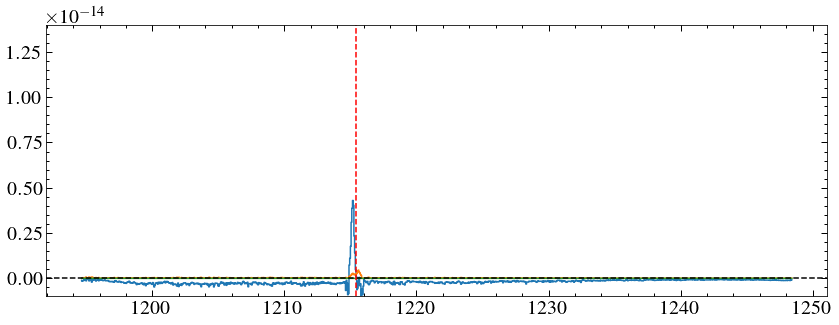

In [33]:
f_new = []
e_new = []
i = 0
for x in new_x1ds:
    rootname = fits.getheader(x,0)['ROOTNAME']
    if picks['A2CENTER'][np.argwhere(picks['ROOTNAME']==rootname)[0][0]] != 0.0:
        data = fits.getdata(x, 1)[0]
        if i == 0:
            w_new = data['WAVELENGTH']
            w_new = np.arange(w_new[5], w_new[-6], np.mean(np.diff(w_new)))
            #f_new.append(data['FLUX'])
            #e_new.append(data['ERROR'])
            #print(len(w_new))
        #else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'], fill_value='extrapolate')(w_new)
        #wi, fi, ei = resample.bintogrid(data['WAVELENGTH'], data['FLUX'], unc=data['ERROR'], newx = w_new)
        f_new.append(fi)
        ei = interpolate.interp1d(data['WAVELENGTH'], data['ERROR'], fill_value='extrapolate')(w_new)
        e_new.append(ei)
        #print(len(wi))
        #plt.step(data['WAVELENGTH'], data['FLUX'])
        #f_new.append(data['FLUX'])
        i += 1

f_new, v_new, e_new = new_coadd(np.array(f_new), np.array(e_new))


plt.step(w_new, f_new)
plt.step(w_new,e_new)
plt.step(w_new, v_new)
#plt.step(w_full, f_full)
#plt.errorbar(w_new, f_new, yerr=e_new)
#plt.plot(lw, lf)
#plt.xlim(1212, 1218)

plt.ylim(-1e-15, 1.4e-14)
plt.axhline(0, c='k', ls ='--')
plt.axvline(1215.44, ls ='--', c='r')